In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [64]:
import numpy as np

In [65]:
# read data
train = pd.read_csv('input-rss/train.csv')
store = pd.read_csv('input-rss/store.csv')
test = pd.read_csv('input-rss/test.csv')

/tmp/ipykernel_1591/309179011.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('input-rss/train.csv')


In [66]:
print(store.info()) 
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dty

### Store
- CompetitionDistance (3 null) mit durchschnitt eintragen
- CompetitionOpenSinceMonth -> gelöscht
- CompetitionOpenSinceYear -> gelöscht
- Promo2 -> 0: kein Promo2, 
            1: Promo2 aktiv -> Promo2SinceWeek, Promo2SinceYear, PromoInterval

### Train
- Date -> Datum; Änderung in Datetime bzw. Jahr, Monat, Tag, Woche, Tag im Jahr, Tag der Woche, Feiertag
- StateHoliday -> 0: kein Feiertag, a: Feiertag (Gesetzlich), b: Feiertag (Ostern), c: Feiertag (Christmas); Änderung in 0, 1, 2, 3
- SchoolHoliday -> 0: kein Schulferien, 1: Schulferien

In [67]:
# data cleaning
# fill missing CompetitionDistance with mean
store['CompetitionDistance'].fillna(store['CompetitionDistance'].mean(), inplace=True)

In [68]:
# drop columns 4 and 5 of store
store.drop(store.columns[[4,5]], axis=1, inplace=True)

In [69]:
# map strings to categorical values
store['StoreType'] = store['StoreType'].map({'a':0, 'b':1, 'c':2, 'd':3})
store['Assortment'] = store['Assortment'].map({'a':0, 'b':1, 'c':2})
store.head()


,Store,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,2,0,1270.0,0,NaN,NaN,NaN
1,2,0,0,570.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,0,0,14130.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,2,2,620.0,0,NaN,NaN,NaN
4,5,0,0,29910.0,0,NaN,NaN,NaN


In [70]:
# encode PromoInterval
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
store['PromoInterval'] = le.fit_transform(store['PromoInterval'].astype(str))
store['Promo2SinceWeek'] = le.fit_transform(store['Promo2SinceWeek'].astype(str))
store['Promo2SinceYear'] = le.fit_transform(store['Promo2SinceYear'].astype(str))

Fehlende Werte in Store aufgefüllt:

    PromoInterval: 544 

    Promo2SinceWeek: 544

    Promo2SinceYear: 544
    
    Aufgefüllt und zu Kategoerien umgewandelt

In [71]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,2,0,1270.0,0,24,7,3
1,2,0,0,570.0,1,2,1,1
2,3,0,0,14130.0,1,3,2,1
3,4,2,2,620.0,0,24,7,3
4,5,0,0,29910.0,0,24,7,3


# Data Cleaning Train & Test Data

In [72]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [73]:
train['StateHoliday'] = le.fit_transform(train['StateHoliday'].astype(str))
print(train.head())

test['StateHoliday'] = le.fit_transform(test['StateHoliday'].astype(str))
test['Open'] = le.fit_transform(test['Open'].astype(str))
print(test.head())

   Store  DayOfWeek        Date  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1             0   
1      2          5  2015-07-31   6064        625     1      1             0   
2      3          5  2015-07-31   8314        821     1      1             0   
3      4          5  2015-07-31  13995       1498     1      1             0   
4      5          5  2015-07-31   4822        559     1      1             0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  
   Id  Store  DayOfWeek        Date  Open  Promo  StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17     1      1             0              0
1   2      3          4  2015-09-17     1      1             0              0
2   3      7          4  2015-09-17     1      1             0              0
3   4      8          4  2015-09-17     1      1             0              0
4   5      9   

Date bei beiden

In [74]:
# split date into year, month, day
train['Date'] = pd.to_datetime(train['Date'])
train['Date_Year'] = train['Date'].dt.year
train['Date_Month'] = train['Date'].dt.month
train['Date_Day'] = train['Date'].dt.day
train = train.drop('Date', axis=1)

# split date into year, month, day
test['Date'] = pd.to_datetime(test['Date'])
test['Date_Year'] = test['Date'].dt.year
test['Date_Month'] = test['Date'].dt.month
test['Date_Day'] = test['Date'].dt.day
test = test.drop('Date', axis=1)


In [75]:
print(train.head())
print(test.head())

   Store  DayOfWeek  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5   5263        555     1      1             0   
1      2          5   6064        625     1      1             0   
2      3          5   8314        821     1      1             0   
3      4          5  13995       1498     1      1             0   
4      5          5   4822        559     1      1             0   

   SchoolHoliday  Date_Year  Date_Month  Date_Day  
0              1       2015           7        31  
1              1       2015           7        31  
2              1       2015           7        31  
3              1       2015           7        31  
4              1       2015           7        31  
   Id  Store  DayOfWeek  Open  Promo  StateHoliday  SchoolHoliday  Date_Year  \
0   1      1          4     1      1             0              0       2015   
1   2      3          4     1      1             0              0       2015   
2   3      7          4     1      1   

for later use
```# merge year, month, day to date
train['Date'] = train['Date_Year'].map(str) + '-' + train['Date_Month'].map(str) + '-' + train['Date_Day'].map(str)```

StoreType and Assortment merged to train- and testdataset

In [76]:
# merge train and store assortments
train = pd.merge(train, 
                 store[['StoreType', 'Assortment']],
                 left_on='Store', 
                 right_index=True)
test = pd.merge(test, 
                store[['StoreType', 'Assortment']],
                left_on='Store', 
                right_index=True)

print(train.head())
print(test.head())

      Store  DayOfWeek  Sales  Customers  Open  Promo  StateHoliday  \
0         1          5   5263        555     1      1             0   
1115      1          4   5020        546     1      1             0   
2230      1          3   4782        523     1      1             0   
3345      1          2   5011        560     1      1             0   
4460      1          1   6102        612     1      1             0   

      SchoolHoliday  Date_Year  Date_Month  Date_Day  StoreType  Assortment  
0                 1       2015           7        31          0           0  
1115              1       2015           7        30          0           0  
2230              1       2015           7        29          0           0  
3345              1       2015           7        28          0           0  
4460              1       2015           7        27          0           0  
        Id  Store  DayOfWeek  Open  Promo  StateHoliday  SchoolHoliday  \
0        1      1          4   

In [77]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016267 entries, 0 to 1017207
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype
---  ------         --------------    -----
 0   Store          1016267 non-null  int64
 1   DayOfWeek      1016267 non-null  int64
 2   Sales          1016267 non-null  int64
 3   Customers      1016267 non-null  int64
 4   Open           1016267 non-null  int64
 5   Promo          1016267 non-null  int64
 6   StateHoliday   1016267 non-null  int64
 7   SchoolHoliday  1016267 non-null  int64
 8   Date_Year      1016267 non-null  int64
 9   Date_Month     1016267 non-null  int64
 10  Date_Day       1016267 non-null  int64
 11  StoreType      1016267 non-null  int64
 12  Assortment     1016267 non-null  int64
dtypes: int64(13)
memory usage: 108.5 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41040 entries, 0 to 41086
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype
---  ------         ----------

<AxesSubplot: >

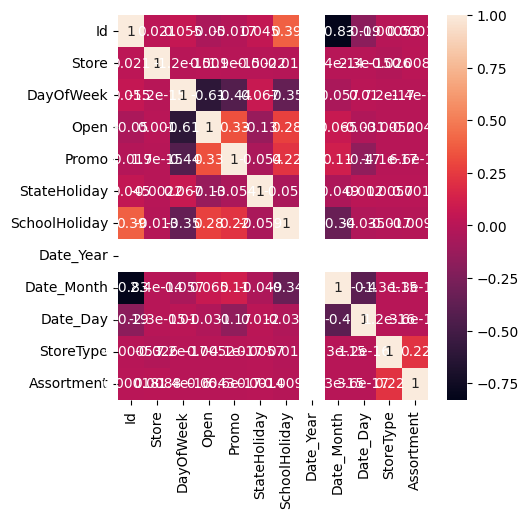

In [78]:
plt.figure(figsize=(5,5))
sns.heatmap(test.corr(),annot=True)

<AxesSubplot: >

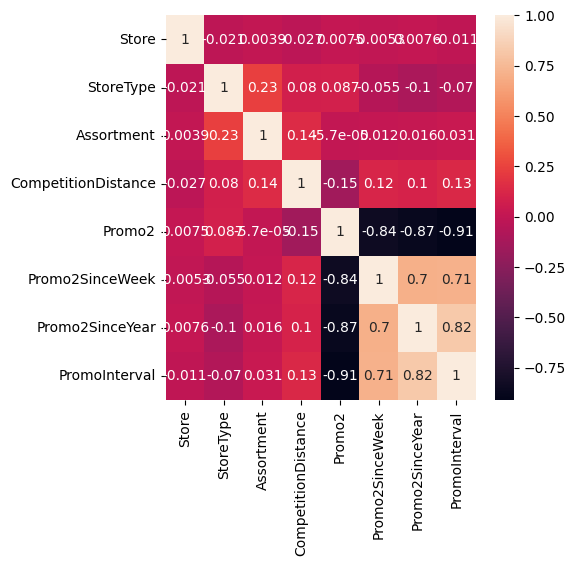

In [79]:
plt.figure(figsize=(5,5))
sns.heatmap(store.corr(),annot=True)

In [80]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Store                1115 non-null   int64  
 1   StoreType            1115 non-null   int64  
 2   Assortment           1115 non-null   int64  
 3   CompetitionDistance  1115 non-null   float64
 4   Promo2               1115 non-null   int64  
 5   Promo2SinceWeek      1115 non-null   int64  
 6   Promo2SinceYear      1115 non-null   int64  
 7   PromoInterval        1115 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 69.8 KB


## Split of data

In [81]:
y = train['Sales']
df = train.drop('Sales', axis=1)

# split data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [82]:
#def root_mean_squared_error(y_true, y_pred):
#    return np.sqrt(np.mean((y_true - y_pred)**2))

In [83]:
#def print_rmse(model, modelname, print_train_rmse=True):
#    if print_train_rmse:
#         print(modelname, "train rmse", root_mean_squared_error(y_train, model.predict(x_train)))
#    print(modelname, "valid rmse", root_mean_squared_error(y_valid, model.predict(x_valid)))

In [84]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor


In [85]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(x_train, y_train)
print(knn.score(x_test, y_test))

0.9003273363217383


In [86]:
dt = DecisionTreeRegressor(min_samples_leaf=23, max_depth=27, random_state=42)
dt.fit(x_train, y_train)
print(dt.score(x_test, y_test))

0.9357382619347128


In [87]:
pipeline_dt = make_pipeline(DecisionTreeRegressor(random_state=42))
print(pipeline_dt.get_params())

{'memory': None, 'steps': [('decisiontreeregressor', DecisionTreeRegressor(random_state=42))], 'verbose': False, 'decisiontreeregressor': DecisionTreeRegressor(random_state=42), 'decisiontreeregressor__ccp_alpha': 0.0, 'decisiontreeregressor__criterion': 'squared_error', 'decisiontreeregressor__max_depth': None, 'decisiontreeregressor__max_features': None, 'decisiontreeregressor__max_leaf_nodes': None, 'decisiontreeregressor__min_impurity_decrease': 0.0, 'decisiontreeregressor__min_samples_leaf': 1, 'decisiontreeregressor__min_samples_split': 2, 'decisiontreeregressor__min_weight_fraction_leaf': 0.0, 'decisiontreeregressor__random_state': 42, 'decisiontreeregressor__splitter': 'best'}


In [88]:
#hyperparameters_dt = { 'decisiontreeregressor__max_depth' : [None, 3, 8, 10],
#                      'decisiontreeregressor__min_samples_split': [1, 5, 0.05],
#                       'decisiontreeregressor__min_samples_leaf': [ 2, 0.01]}

In [89]:
#dt_cv = GridSearchCV(pipeline_dt, hyperparameters_dt, cv=10)
#dt_cv.fit(x_train, y_train)
#print(dt_cv.best_params_)
#print(dt_cv.best_score_)
#print(dt_cv.score(x_test, y_test))

In [90]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
print(rf.score(x_test, y_test))

: 

: 

In [ ]:
ada = AdaBoostRegressor(n_estimators=100, random_state=42)
ada.fit(x_train, y_train)
print(ada.score(x_test, y_test))

In [ ]:
#pipeline_svr = make_pipeline(SVR())
#print(pipeline_svr.get_params())

In [ ]:
#hyperparameters_svr = { 'svr__kernel' : ['rbf'],
#                      'svr__C': [0.01, 1, 10],
#                       'svr__gamma': [0.01, 1, 10]}

In [ ]:
#svr_cv = GridSearchCV(pipeline_svr, hyperparameters_svr, cv=10)
#svr_cv.fit(x_train, y_train)
#print(svr_cv.best_params_)
#print(svr_cv.best_score_)
#print(svr_cv.score(x_test, y_test))

In [ ]:
#pipeline_gbr = make_pipeline(GradientBoostingRegressor(random_state=42))
#print(pipeline_gbr.get_params())

In [ ]:
#hyperparameters_gbr = { 'gradientboostingregressor__n_estimators' : [10, 25, 50],
#                      'gradientboostingregressor__max_depth': [3, 5, 8],
#                       'gradientboostingregressor__min_samples_split': [2, 0.1, 0.01],
#                       'gradientboostingregressor__min_samples_leaf': [ 2, 0.1, 0.01]}

In [ ]:
#gbr_cv = GridSearchCV(pipeline_gbr, hyperparameters_gbr, cv=10)
#gbr_cv.fit(x_train, y_train)
#print(gbr_cv.best_params_)
#print(gbr_cv.best_score_)
#print(gbr_cv.score(x_test, y_test))

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
gbr.fit(x_train, y_train)
print(gbr.score(x_test, y_test))

# Wenn fertig, dass Anpassen und laufen lassen

In [ ]:
#test['Sales'] = gbr.predict(test)
#test['Sales'] = test['Sales'].astype(int)
#test = test.drop(['Date_Year', 'Date_Month', 'Date_Day'], axis=1)
#test = test[['Id', 'Sales']]
#test.to_csv('submission.csv', index=False)